## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combined data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results,on="Mouse ID",how="outer")
# Displaying the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice
mouse_count = merge_df["Mouse ID"].nunique()
print("There are " + str(mouse_count) + " unique mice within the data")

There are 249 unique mice within the data


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
drop_duplicates = merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
drop_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Creainge a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [10]:
# Checking the number of mice in the clean DataFrame.
sorted_df = merge_df.groupby(["Mouse ID","Timepoint"])
find_dupes = sorted_df.head()
duplicates = find_dupes[find_dupes.duplicated(["Mouse ID","Timepoint"])]

In [11]:
#Only way i could get the groupby to implicitly create an index
drop_duplicates = find_dupes.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df=drop_duplicates

## Summary Statistics

In [12]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean2 = clean_df.groupby(["Drug Regimen"])



mean= clean2["Tumor Volume (mm3)"].mean()
median = clean2["Tumor Volume (mm3)"].median()
std_dev = clean2["Tumor Volume (mm3)"].std()
sem = clean2["Tumor Volume (mm3)"].sem()
var = clean2["Tumor Volume (mm3)"].var()
summary_df = pd.DataFrame({"Mean":mean,
                           "Median":median,
                           "Variance":var,
                           "Standard Deviation":std_dev,
                           "SEM":sem
                           })
# summary_df.set_index('Drug Regimen', inplace=True)
summary_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


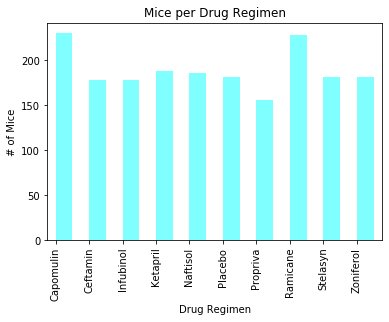

In [14]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
# This method produces everything in a single groupby function
mice_total = clean2["Mouse ID"].count()
regimen = list(mice_total.index)
ticks = np.arange(len(list(mice_total.index)))
per_regimen = mice_total.values

plot = mice_total.plot.bar(title="Mice per Drug Regimen", color="cyan", alpha=.5,align="edge")
plot.set_ylabel("# of Mice")
plot.set_xlabel("Drug Regimen")
plot

## Bar and Pie Charts

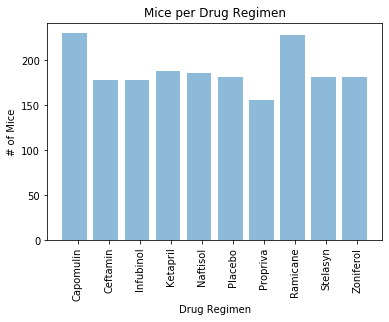

In [16]:
# Generated a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Matplotlib
mice_total = clean2["Mouse ID"].count()
regimen = list(mice_total.index)
ticks = np.arange(len(list(mice_total.index)))
per_regimen = mice_total.values


plt.bar(ticks-0.5, per_regimen, alpha=0.5, align="edge")
plt.xticks(ticks, regimen, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("Mice per Drug Regimen")
plt.show()


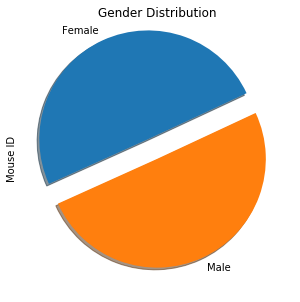

In [30]:
# Generated a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex"]).nunique()
#gender_group.head()
explode = (.2,0)
gender_group2 = gender_group["Mouse ID"].head()
gender_group2.plot(kind="pie", figsize=(7,5), explode=explode, shadow=True, startangle=25, title="Gender Distribution")
plt.show()
#this is still wildly incomplete skip past
# need to generate a pie plot showing the distribution of female versus male mice using pyplot

Text(0.5, 1.0, 'Gender Distribution')

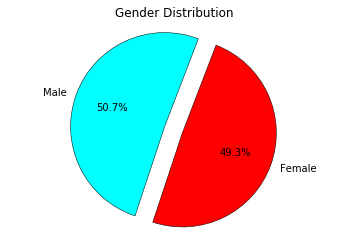

In [35]:
# need to generate a pie plot showing the distribution of female versus male mice using pyplot
names = clean_df["Sex"].unique()
counts =  clean_df["Sex"].value_counts()
plt.pie(counts, labels=names, colors =("cyan","red"), autopct='%1.1f%%', wedgeprops = {'linewidth': .5, 'edgecolor':'black'}, startangle=69, explode=explode)
plt.axis("equal")
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [ ]:
max_timepoint = clean_df.groupby(["Mouse ID"]).max()
regimen_max = max_timepoint.loc[(max_timepoint["Drug Regimen"])]

In [ ]:
# Trying to calculate the final tumor volume of each mouse across four of the treatment regimens:  (needing each mice's final tumor volume under these specific regimens)
counter = 0
#Previous row to calculate change between rows
previous = 0
#Temp variable to 
Temp1 = 0
Temp2 = 0
Temp3 = 0
Temp4 = 0
#Greater Increase
MaxCap = 0
MaxRam = 0
MaxInf = 0
MaxCef = 0
for row,col in group.itterrows():
    if row == "Capolmulin" == (["Mouse ID"] ==["Mouse ID"])
        Temp1 > MaxCapo:
        MaxCap = Temp1
    elif row = "Ramicane":
        Ramicane.append(col[MaxRam])
    elif row = "Infubinol":
        Infubinol.append(col[MaxInf])
    elif row = "Ceftamin":
        Ceftamin.append(col[MaxCef])

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Starting by getting the last(greatest) timepoint for each mouse

# Then merging this group df with the original dataframe to get the tumor volume at the last timepoint

In [26]:
# Putting treatments into a list for for loop (and later for plot labels)
Capolmulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

for row,col in group.itterrows():
    if row == "Capolmulin" :
        Capolmulin.append(col["Tumor Volume (mm3)"])
    elif row = "Ramicane":
        Ramicane.append(col["Tumor Volume (mm3)"])
    elif row = "Infubinol":
        Infubinol.append(col["Tumor Volume (mm3)"])
    elif row = "Ceftamin":
        Ceftamin.append(col["Tumor Volume (mm3)"])

SyntaxError: invalid syntax (<ipython-input-26-afa767daad49>, line 15)

In [ ]:
# need tp create empty list to fill with tumor vol data (for plotting)


# need to clculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # need to Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # need to add subset 
    
    
    # need to determine outliers using upper and lower bounds
    

In [ ]:
# need to generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# need to generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# need to generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
#need to calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
